In [49]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data, img_as_float
from skimage import exposure
from src.preprocessing.rescaling import scaler
from sklearn.preprocessing import normalize

In [8]:
dataset_folder = "data/dev_dataset/"
chexpert_folder = dataset_folder + "CheXpert-v1.0-small/"
#os.chdir("../../")
os.getcwd()

'C:\\Users\\tsbau\\git\\idp-radio-1'

In [20]:
frontal = mpimg.imread(chexpert_folder + 'train/patient00002/study1/view1_frontal.jpg')
frontal

array([[12, 16, 21, ...,  0,  0,  2],
       [18, 17, 20, ..., 28,  2,  0],
       [19, 18, 25, ..., 70,  0,  2],
       ...,
       [43, 47, 56, ..., 33, 32, 23],
       [83, 50, 48, ..., 25, 17, 41],
       [87, 86, 93, ..., 92, 94, 88]], dtype=uint8)

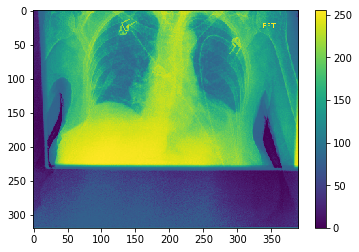

In [39]:
imgplot = plt.imshow(frontal)
plt.colorbar()

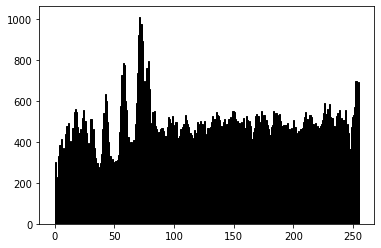

In [45]:
imghist = plt.hist(frontal.ravel(), bins=255, range=(0, 255), fc='k', ec='k')

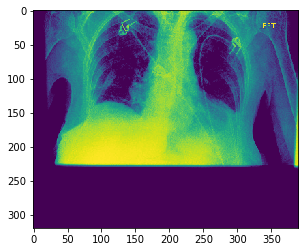

In [48]:
imgplot = plt.imshow(frontal, clim=(100, 255))

In [51]:
normalized_frontal = normalize(frontal)

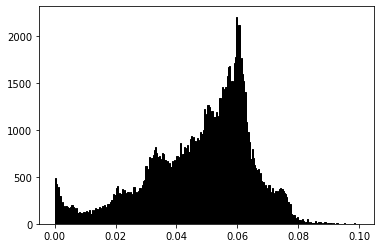

In [54]:
normalized_imghist = plt.hist(normalized_frontal.ravel(), bins=255, range=(0.0, 0.1), fc='k', ec='k')

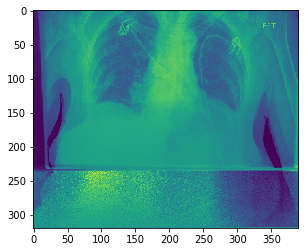

In [55]:
normalized_imgplot = plt.imshow(normalized_frontal)